## Load data

In [1]:
from dmml_project.dataset import Dataset
from dmml_project import PROJECT_ROOT, PAPER_IMAGES
import matplotlib.pyplot as plt
import seaborn as sns

dataset: Dataset = Dataset.load(f'{PROJECT_ROOT}/data/dataset.tsv')

## Data exploration

### Class distribution

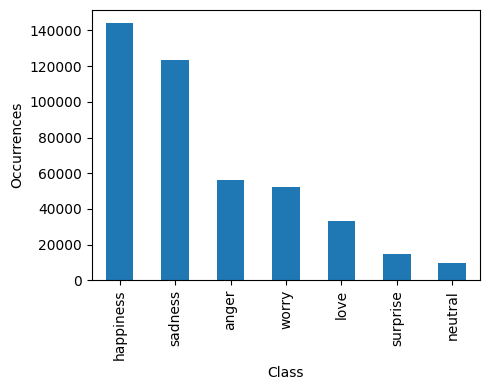

In [2]:
fig = plt.figure(figsize=(5, 4))
dataset.data['label'].value_counts().plot(kind='bar', xlabel='label', ylabel='occurrences')
plt.xlabel("Class")
plt.ylabel("Occurrences")
plt.tight_layout()
plt.savefig(f'{PAPER_IMAGES}/class_distribution.png')
plt.show()

### Length distribution
The length was capped at 400 to make the graph more readable, nearly all sequences are shorter than 400.

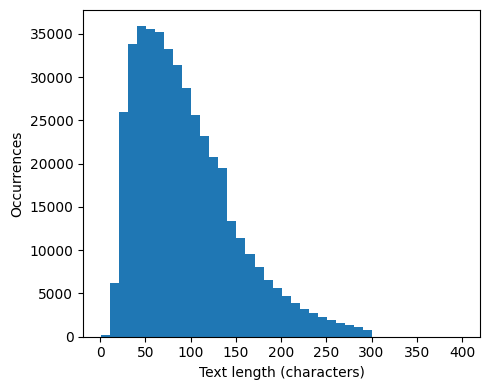

In [3]:
fig = plt.figure(figsize=(5, 4))
plt.hist([min(len(x), 400) for x in dataset.data['text']], bins=40)
plt.xlabel("Text length (characters)")
plt.ylabel("Occurrences")
plt.tight_layout()
plt.savefig(f'{PAPER_IMAGES}/length_distribution.png')
plt.show()

## Preprocessing

In [4]:
from dmml_project.preprocessor import Preprocessor

pp: Preprocessor = Preprocessor.load(f"{PROJECT_ROOT}/data/preprocessor/tfidf.pkl")

In [5]:
random_examples = dataset.data['text'].sample(5)
print("Before preprocessing:")
print(random_examples)
print("After preprocessing:")
print(pp(random_examples))

Before preprocessing:
424618    i feel like weve got some positive vibes and t...
431023    i feel like with you supporting me so much i s...
325753    i strongly feel that we all have the divine ab...
202633       i feel that my birthday is unimportant anyways
16476     i feel like im the only college student whos n...
Name: text, dtype: object
After preprocessing:
  (0, 1655)	0.3569605263956364
  (0, 2650)	0.21794586921754858
  (0, 3775)	0.2891467757177758
  (0, 7760)	0.26448163142161774
  (0, 14905)	0.20825970026684254
  (0, 15738)	0.04240132020872236
  (0, 17084)	0.18357519819330334
  (0, 18734)	0.19315444712430957
  (0, 19433)	0.23045733311961775
  (0, 26671)	0.10925873236508193
  (0, 28909)	0.21871323565617432
  (0, 36175)	0.22742066482576576
  (0, 36189)	0.2477215589467919
  (0, 41808)	0.26739646718792787
  (0, 46802)	0.1632988640945392
  (0, 46808)	0.15820159990530255
  (0, 50444)	0.3265340395144812
  (0, 51569)	0.31552281062485066
  (1, 161)	0.36146137800458816
  (1, 15738)	0.

In [6]:
violin_plot_data = dataset.data.copy()
violin_plot_data['len'] = violin_plot_data['text'].apply(lambda x: len(x))

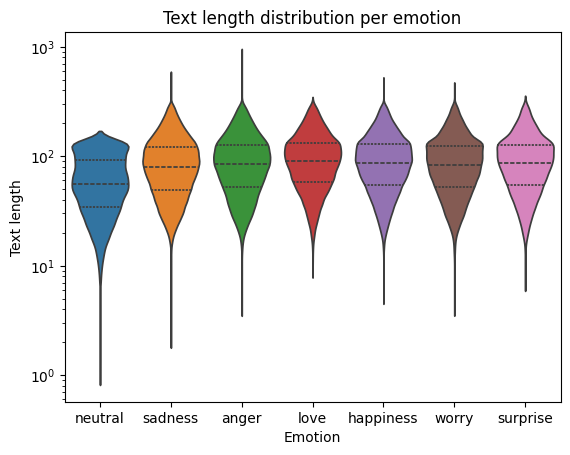

In [7]:
sns.violinplot(data=violin_plot_data, x='label', y='len', hue='label', inner='quartile', log_scale=True).set_title('Text length distribution per emotion')
plt.xlabel('Emotion')
plt.ylabel('Text length')
plt.show()